In [8]:
import pandas as pd
import numpy as np
from collections import Counter
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
import warnings
warnings.filterwarnings("ignore")

In [170]:
#Дропаем левую колонку, дату (потом че то придумать) и ИДшник скважины
data = pd.read_csv('gazporn2.csv',encoding='cp1251',decimal=',').drop(["'111",'Unnamed: 1','Скважина','Дата','Характер работы',
                    'Время накопления','Добыча растворенного газа, м3','Тип скважины','Тип насоса',
                    'Коэффициент сепарации',
                    'Вязкость воды в пластовых условиях',
                    'Плотность нефти',
                    'Плотность воды',
                    'ТП - JD опт.',
                    'ТП - SKIN',
                    'Радиус контура питания',
                    'Назначение по проекту',
                    'Замерное забойное давление',
                    'Тип дополнительного оборудования',
                    'Мощность ПЭД',
                    'I X/X',
                    'Ток номинальный',
                    'Тип ГЗУ',
                    'ДНС',
                    'Время в работе',
                    'Время в накоплении',
                    'ГП(ИДН) Дебит жидкости скорр-ый',
                    'ГТМ', 'Метод', 'Состояние', 'Причина простоя','Дебит попутного газа, м3/сут',
                                                                       "ГП(ГРП) Дебит жидкости скорр-ый'",
                                                                       'Вода, т', 'Жидкость, т','Qж, т/сут',
                                                                       'Диаметр НКТ',
'Частота',
'Затрубное давление',
'Давление наcыщения',
'Газовый фактор',
'Температура пласта',
'Вязкость нефти в пластовых условиях',
'объемный коэффициент',
'ТП - Забойное давление',
'Дата пуска',
'Номер бригады',
'Нефтенасыщенная толщина',
'Пластовое давление начальное','ГТМ', 'Метод', 'Состояние', 'Причина простоя','Дата_2', 'Пласт МЭР','Удельный коэффициент',
'Характеристический дебит жидкости',
'ГП(ГРП) Дебит жидкости','Куст'


],axis=1).apply(lambda x: x.replace("''",''))

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

In [172]:
y = np.array(data['Нефть, т'])
data = data.drop(['Нефть, т'], axis=1)
print(len(data))
X = np.array(data)

804


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [173]:
model = xgb.XGBRegressor()
model.fit(X_train,y_train,eval_metric='mae')
y_pred_xgb = model.predict(X_test)
print(mean_absolute_error(y_test,y_pred_xgb))

136.17287566476617


data

In [140]:
for i in list(zip(data.columns.get_values(),model.feature_importances_)):
    if i[1]==0:
        print("'"+str(i[0])+"',")

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f31f16fdd30>>
Traceback (most recent call last):
  File "/home/alex/miniconda3/lib/python3.6/site-packages/xgboost/core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


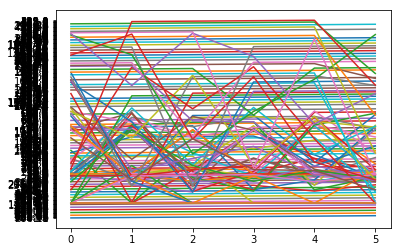

In [94]:
import matplotlib.pyplot as plt

y = np.array(pd.read_csv('gazporn2.csv',encoding='cp1251',decimal=',')['Нефть, т'])

lists = []
for i in range(0,len(y),6):
    list_ = []
    for j in range(6):
        list_.append(y[i+j])
    list_ = np.array(list_)
    lists.append(list_)

x = np.arange(6)
    
for l in lists:
    plt.plot(x, l)
plt.show()

In [174]:
test_data = pd.read_csv('task2_data/test_2.9.csv',encoding='cp1251',decimal=',').apply(lambda x: x.replace(',','.'))
test_data = test_data[data.columns.get_values()]

In [175]:
#test_data["Причина простоя"] = test_data["Причина простоя"].fillna(value= "Нет_Причины")

    
map = {'Наклонно-направленно':1,'Горизонтально':2,'Вертикально':2}
test_data = test_data.replace({'Тип скважины':map})
map = {'()':1,'Массомер ()':2,'ГЗУ "Спутник" ()':2}
test_data = test_data.replace({'Тип ГЗУ':map})
map = {'ДНС-1':1,'ДНС-3':2,'ДНС-5':3,'ДНС-2':4,'ДНС-7':4}
test_data = test_data.replace({'ДНС':map})
map = {'Хвостовик':1}
test_data = test_data.replace({'Тип дополнительного оборудования':map})
map = {'Нефтяные':1,'Нагнетательные':2}
test_data = test_data.replace({'Назначение по проекту':map})
map = {'FC-925(125)-2400':1,'ЭЦНКИД 5a-125-2400':2,'ЭЦНКИД 5a-125-2500':3,'FC-450(50)-2400':4
       ,'FC-650(80)-2400':5,'ЭЦНКИД 5-80-2500':6,'FC-650(80)-2300':7,'FC-925(125)-2300':8
       ,'D700EZ-2450':9,'D420EZ-2400':10,'FC-925-2500':11,'FC Р-3-2400':12,'ВНН5-44-2400':13,'DN-1100-2300':13
       ,'ЭЦНКИД 5-50-2500':14,'ВНН-79-2400':15,'ЭЦН-60-2500':16,'FC-925-2450':16,'D420EZ-2200':16
       ,'FC P-6-2500':16,'ЭЦНКИД 5-50-2300':16,'ЭЦНКИД 5а-125-2600':16,'D530EZ-2550':16,'467 MT100':17
       ,'FC-450(50)-2300':17,'ВНН-59-2350':17,'ЭЦНКИД 5-80-2300':17,'D700EZ-2250':17,'ЭЦН-35-2500':17
       ,'ВНН5-59-2450':17,'ВНН5-79-2600':18,'FC Р-10-2400':18,'DN-1100-2300 ':18,'ЭЦНД-100-2400':18
       ,'FC-925(125)-2250':18,'ЭЦН-50-2700':18,'D1150N':18,'ВНН5-79-2400':18,'ВНН-100-2400':18,'FC P-6-2400':18
       ,'ЭЦН (МТ)-80-2400':18,'FC-650(80)-2250':19,'ЭЦНКИД 5a-100-2400':19,'ЭЦН-60-2400':19,'ВНН5-59-2250':19
       ,'ЭЦН-80-2900':19,'DN-1100-2250':19,'ЭЦН (МТ)-80-2350':19,'ЭЦНД-60-2200':19,'ЭЦН-60-2800':19
       ,'ВНН5-79-2350':19,'FC-1600(200)-2400':20,'ЭЦН-35-3150':20,'FC Р-3-2300':20,'D700EZ-2150':20
       ,'ЭЦН-35-2900':20,'D1000EZ-2500':20,'FC-650(80)-2500':20,'ВНН5-59-2350':20,'ВНН5-79-2500':20
       ,'FC P-10-2450':20,'ВНН5-125-2600':20,'380 D1200EZ':20,'ВНН-59-2200':20,'FC P-12-2500':21,'D1000EZ-2300':21
       ,'ВНН5-124-2500':21,'ВНН-44-2450':21,'D420EZ-2500':21,'ЭЦНКИД 5-80-2400':21,'ВНН-124-2300':21
       ,'ЭЦНД-125-2400':21,'FC-450(50)-2350':21,'ВНН-100-2250':21,'FC P-4-2450':21,'ВНН-79-2300':21
       ,'D1000EZ-2400':21,'D700EZ-2400':21,'Воронка с пакером':21,'ВНН-59-2250':22,'ВНН5-125-2350 Новомет':22
       ,'ЭЦНКИД 5-80-2600':22,'D530EZ-2700':22,'ЭЦН-100-2400':22,'ВНН5-59-2400':22,'D1000EZ-2200':22
       ,'FC-230-2400':22,'FC-650(80)-2450':22,'ЭЦН-60-2350':22,'D700EZ-2300':22,'SPI D-20-2350':22
       ,'FC-925(125)-2350':22,'ЭЦН (МТ)-60-2350':22,'ВНН5-59-2600':23,'Х-10(125)-2400':23,'ЭЦН-125-2600':23
       ,'ЭЦНД-100-2350':23,'ВНН-79-2350':23,'D420EZ-2300':23,'FC P6-2550':23,'ЭЦН (МТ)-80-2500':23
       ,'ВНН-59-2400':23}
test_data = test_data.replace({'Тип насоса':map})
map = {'ЭЦН':1,'ЭЦН/ФОН':2,'ФОН':3,'ЭЦН/ -':3,'ФОН/ЭЦН':3,'ЭЦН/Без способа':3}
test_data = test_data.replace({'Метод':map})
map = {'НЕФ':1,'НАГ':2,'НЕФ/НАГ':3}
test_data = test_data.replace({'Характер работы':map})
map = {'Нет_Причины':0,'Геологич.причина':1,'Прочие':2,'Прочие aвaрии':2,'ПРИНЯТА В ОСВОЕНИЕ':3
       ,'Принята в освоение':3,'Останов по распоряжен.':4,'Техническ.причина':5,'R=0':6,'Ввод новой скважины':7
       ,'Перевод в ППД':8,'ПЕРЕВОД В ППД':8,'Нет подачи':9,'Освоение после бурения':10,'ОСВОЕНИЕ ПОСЛЕ БУРЕНИЯ':10
       ,'ГРП':11,'Заклинивание насос':12,'Перевод скв.в другой фонд':13,'Ремонт назем.электрообор.':14
       ,'Ревиз.подзем.оборудования':15,'Отключение напряжения':15,'Отсутствие связи с ТМС':15
       ,'НЕТ ПРИЕМИСТОСТИ':15,'Ремонт соседней скважина':15,'СКО пласта':15,'НЕИСПРАВНОСТЬ СУ, ЧП':15
       ,'Заморожен коллектор':15,'Недоосвоена после ПРС':15,'Нет приемистости':15,'Замена СУ на ЧП':15
       ,'Пропaркa фонтaн.aрмaтуры':15,'Ремонт запорной арматуры':15,'Дисбаланс напряжения':15
       ,'Сменa НКТ из-зa негермет.':15,'ОТКЛЮЧЕНИЕ ФИДЕРА':15,'Недогрузка':15,'Неисправ.глуб.оборуд.':15
       ,'Технолог.причина':15,'ОЖИДАН.КАПИТАЛ.РЕМОНТА':15,'Останов скв - исслед., замеры':15
       ,'ОТКЛЮЧЕНИЕ НАПРЯЖЕНИЯ':15,'ПЕРЕВ.НA МЕXДОБ.ПРЕК.ФОН.':15,'Перевод нa ЭЦН':15,'Высокое напряжение':15}
test_data = test_data.replace({'Причина простоя':map})
map = {'РАБ.':1,'ОСВ ТГ':2,'НАК':3,'ОСТ.':4,'Б/Д ТГ':5,'ПЬЕЗ':6,'ОЖ ОСВ ТГ':7,'ОСВ ПР ЛЕТ':8,'Б/Д ПР Л':9}
test_data = test_data.replace({'Состояние':map})

In [176]:
data_1st_month = []
for i in range(0,len(data),6):
    data_1st_month.append(np.array(data.iloc[i]))

data_1st_month = pd.DataFrame(data_1st_month,columns=data.columns.values)

data_2nd_month = []
for i in range(0,len(data),6):
    data_2nd_month.append(np.array(data.iloc[i+1]))

data_2nd_month = pd.DataFrame(data_2nd_month,columns=data.columns.values)

data_3rd_month = []
for i in range(0,len(data),6):
    data_3rd_month.append(np.array(data.iloc[i+2]))

data_3rd_month = pd.DataFrame(data_3rd_month,columns=data.columns.values)

data_4th_month = []
for i in range(0,len(data),6):
    data_4th_month.append(np.array(data.iloc[i+3]))

data_4th_month = pd.DataFrame(data_4th_month,columns=data.columns.values)

data_5th_month = []
for i in range(0,len(data),6):
    data_5th_month.append(np.array(data.iloc[i+4]))

data_5th_month = pd.DataFrame(data_5th_month,columns=data.columns.values)

data_6th_month = []
for i in range(0,len(data),6):
    data_6th_month.append(np.array(data.iloc[i+5]))

data_6th_month = pd.DataFrame(data_6th_month,columns=data.columns.values)

In [177]:

#НАНы в категориальных признаках меняем на самый популярный из них
"""categorical_features = {'ГТМ':data['ГТМ'].value_counts()[0]
                       
,'Метод':data['Метод'].value_counts()[0],
                        'Состояние':data['Состояние'].value_counts()[0],
                        'Причина простоя':data['Причина простоя'].value_counts()[0],
                        }"""

#НАНы в статических меняем на среднее из трейна
static_features = {#'Диаметр НКТ':data['Диаметр НКТ'].astype(float).median(),
                   'Диаметр штуцера':data['Диаметр штуцера'].astype(float).median(),
                   'Глубина верхних дыр перфорации':data['Глубина верхних дыр перфорации'].astype(float).median(),
                   'Удлинение':data['Удлинение'].astype(float).median(),
                   'Производительность ЭЦН':data['Производительность ЭЦН'].astype(float).median(),
                   'Напор':data['Напор'].astype(float).median(),
                   'Глубина спуска':data['Глубина спуска'].astype(float).median(),
                   #'Давление наcыщения':data['Давление наcыщения'].astype(float).median(),
                   #'Газовый фактор':data['Газовый фактор'].astype(float).median(),
                   #'Температура пласта':data['Температура пласта'].astype(float).median(),
                   #'Вязкость нефти в пластовых условиях':data_1st_month['Вязкость нефти в пластовых условиях'].astype(float).median(),
                   #'объемный коэффициент':data['объемный коэффициент'].astype(float).median(),
                   'Высота перфорации':data['Высота перфорации'].astype(float).median(),
                   'Глубина спуска.1':data['Глубина спуска.1'].astype(float).median(),
                   'КВЧ':data['КВЧ'].astype(float).median(),
                   'Дата запуска после КРС':data['Дата запуска после КРС'].astype(float).median(),
                   #'Дата пуска':data['Дата пуска'].astype(float).median(),
                   'Дата останова':data['Дата останова'].astype(float).median(),
                   #'Номер бригады':data['Номер бригады'].astype(float).median(),
                   'Дата ввода в эксплуатацию':data['Дата ввода в эксплуатацию'].astype(float).median(),
                  #'Нефтенасыщенная толщина':data['Нефтенасыщенная толщина'].astype(float).median(),
                   'Глубина текущего забоя':data['Глубина текущего забоя'].astype(float).median(),
                   'Ток рабочий':data['Ток рабочий'].astype(float).median(),
                   #'Пластовое давление начальное':data['Пластовое давление начальное'].astype(float).median(),
                   'ГП - Забойное давление':data['ГП - Забойное давление'].astype(float).median()
                   }
"""                  
                   #А тут начинается рандом
                   'Время работы, ч':data['Время работы, ч'].astype(float).median(),
                   'Попутный газ, м3':data_1st_month['Попутный газ, м3'].astype(float).median(),
                   'Простой, ч':data_1st_month['Простой, ч'].astype(float).median(),
                   'Обводненность (вес), %':data_1st_month['Обводненность (вес), %'].astype(float).median(),
                   'Дебит попутного газа, м3/сут':data_1st_month['Дебит попутного газа, м3/сут'].astype(float).median(),
                   'Частота':data_1st_month['Частота'].astype(float).median(),
                   'Буферное давление':data_1st_month['Буферное давление'].astype(float).median(),
                   'Давление в линии':data_1st_month['Давление в линии'].astype(float).median(),
                   'Пластовое давление':data_1st_month['Пластовое давление'].astype(float).median(),
                   'Динамическая высота':data_1st_month['Динамическая высота'].astype(float).median(),
                   'Затрубное давление':data_1st_month['Затрубное давление'].astype(float).median(),
                   'Давление на приеме':data_1st_month['Давление на приеме'].astype(float).median(),
                   'Забойное давление':data_1st_month['Забойное давление'].astype(float).median(),
                   'Обводненность':data_1st_month['Обводненность'].astype(float).median(),
                   'JD факт':data_1st_month['JD факт'].astype(float).median(),
                   'Вязкость жидкости в пласт. условиях':data_1st_month['Вязкость жидкости в пласт. условиях'].astype(float).median(),
                   'Удельный коэффициент':data_1st_month['Удельный коэффициент'].astype(float).median(),
                   'Коэффициент продуктивности':data_1st_month['Коэффициент продуктивности'].astype(float).median(),
                   'ТП - Забойное давление':data_1st_month['ТП - Забойное давление'].astype(float).median(),
                   'К пр от стимуляции':data_1st_month['К пр от стимуляции'].astype(float).median(),
                   'Время до псевдоуст-ся режима':data_1st_month['Время до псевдоуст-ся режима'].astype(float).median(),
                   'Плотность раствора глушения':data_1st_month['Плотность раствора глушения'].astype(float).median(),
                   'Характеристический дебит жидкости':data_1st_month['Характеристический дебит жидкости'].astype(float).median(),
                   'ГП(ИДН) Дебит жидкости':data_1st_month['ГП(ИДН) Дебит жидкости'].astype(float).median(),
                   'ГП(ИДН) Прирост дефита нефти':data_1st_month['ГП(ИДН) Прирост дефита нефти'].astype(float).median(),
                   'ГП(ГРП) Дебит жидкости':data_1st_month['ГП(ГРП) Дебит жидкости'].astype(float).median()"""
                  
non_static_features = ['Время работы, ч', 'Попутный газ, м3',
                       'Простой, ч','Обводненность (вес), %',
                       #'Дебит попутного газа, м3/сут', 
                       #'Частота',
                       'Буферное давление', 'Давление в линии',
                       'Пластовое давление', 'Динамическая высота',
                       #'Затрубное давление',
                       'Обводненность',
                       'JD факт','Вязкость жидкости в пласт. условиях', 
                       #'Удельный коэффициент',
                       'Коэффициент продуктивности', 
                       #'ТП - Забойное давление',
                       'К пр от стимуляции', 'К пр от стимуляции', 'Время до псевдоуст-ся режима',
                       'Плотность раствора глушения', 
                       #'Характеристический дебит жидкости',
                       'ГП(ИДН) Дебит жидкости', 'ГП(ИДН) Прирост дефита нефти', 
                       #'ГП(ГРП) Дебит жидкости'
                        ]

In [178]:
"""for k,v in categorical_features.items():
    test_data[k].fillna(value=v,inplace=True)"""

for k,v in static_features.items():
    test_data[k].fillna(value=v,inplace=True)

new_test_data = []
datasets = [data_2nd_month, data_3rd_month, data_4th_month, data_5th_month, data_6th_month]
for index,row in test_data.iterrows():
    new_test_data.append(row.copy())
    new_test_data.append(row.copy())
    new_test_data.append(row.copy())
    new_test_data.append(row.copy())
    new_test_data.append(row.copy())
    new_test_data.append(row.copy())

for i in range(0,len(new_test_data),6):
    for j in range(1,6):
        for f in non_static_features:
            new_test_data[i+j][f] = datasets[j-1][f].astype(float).median()

new_test_data = pd.DataFrame(new_test_data).fillna(value=0)
new_test_data

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f31f19ece80>>
Traceback (most recent call last):
  File "/home/alex/miniconda3/lib/python3.6/site-packages/xgboost/core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


,"Время работы, ч","Попутный газ, м3","Простой, ч","Обводненность (вес), %",Диаметр экспл.колонны,Диаметр штуцера,Глубина верхних дыр перфорации,Удлинение,Производительность ЭЦН,Напор,Глубина спуска,Буферное давление,Давление в линии,Пластовое давление,Динамическая высота,Давление на приеме,Забойное давление,Обводненность,SKIN,JD факт,Вязкость жидкости в пласт. условиях,Высота перфорации,Коэффициент продуктивности,К пр от стимуляции,Глубина спуска.1,КВЧ,Время до псевдоуст-ся режима,Дата запуска после КРС,Дата останова,Дата ввода в эксплуатацию,Плотность раствора глушения,Глубина текущего забоя,Ток рабочий,ГП - Забойное давление,ГП(ИДН) Дебит жидкости,ГП(ИДН) Прирост дефита нефти
0,200.0,1061.0,544.0,19.000,0,2963.09,384.584,0,2366.41,50.5924,16.9729,0,0,0,0,0,0,0,0,0,0,27.2219,0,0,2657.89,100.219,0,42069.3,42070.3,41089.5,0,0.763953,21.9831,28.2542,0,0
0,0,0,0,22431.000,0,2963.09,384.584,0,2366.41,50.5924,16.9729,15.7467,187.554,2455.08,16.8879,0,0,100.618,0,42006,1.33707,27.2219,0.268801,0.879576,2657.89,100.219,467.223,42069.3,42070.3,41089.5,11.3237,0.763953,21.9831,28.2542,34.7572,2.60509
0,0,0,0,24382.000,0,2963.09,384.584,0,2366.41,50.5924,16.9729,15.7467,187.554,2455.08,16.8879,0,0,100.618,0,42006,1.33707,27.2219,0.268801,0.879576,2657.89,100.219,467.223,42069.3,42070.3,41089.5,11.3237,0.763953,21.9831,28.2542,34.7572,2.60509
0,0,0,0,23076.000,0,2963.09,384.584,0,2366.41,50.5924,16.9729,15.7467,187.554,2455.08,16.8879,0,0,100.618,0,42006,1.33707,27.2219,0.268801,0.879576,2657.89,100.219,467.223,42069.3,42070.3,41089.5,11.3237,0.763953,21.9831,28.2542,34.7572,2.60509
0,0,0,0,22591.355,0,2963.09,384.584,0,2366.41,50.5924,16.9729,15.7467,187.554,2455.08,16.8879,0,0,100.618,0,42006,1.33707,27.2219,0.268801,0.879576,2657.89,100.219,467.223,42069.3,42070.3,41089.5,11.3237,0.763953,21.9831,28.2542,34.7572,2.60509
0,0,0,0,21716.040,0,2963.09,384.584,0,2366.41,50.5924,16.9729,15.7467,187.554,2455.08,16.8879,0,0,100.618,0,42006,1.33707,27.2219,0.268801,0.879576,2657.89,100.219,467.223,42069.3,42070.3,41089.5,11.3237,0.763953,21.9831,28.2542,34.7572,2.60509
1,738.0,74130.0,6.0,26.700,146.8,0.0,2347.0,8.58,125.0,2491.0,2250.0,8.8,7.8,170.0,1238.0,0.0,96.9396955961862,34.0,-4.7,0.4214507527172921,1.6688651716832599,12.0,0.643304190743922,1.08704236533031,2250.65,284.0,58.081552059420396,42936.4166666667,42887.0,42910.0,0.763335927677663,2403.0,20.0,17.8,85.4555275406893,22.0811639138638
1,0,0,0,22431.000,146.8,0.0,2347.0,8.58,125.0,2491.0,2250.0,15.7467,187.554,2455.08,16.8879,0.0,96.9396955961862,100.618,-4.7,42006,1.33707,12.0,0.268801,0.879576,2250.65,284.0,467.223,42936.4166666667,42887.0,42910.0,11.3237,2403.0,20.0,17.8,34.7572,2.60509
1,0,0,0,24382.000,146.8,0.0,2347.0,8.58,125.0,2491.0,2250.0,15.7467,187.554,2455.08,16.8879,0.0,96.9396955961862,100.618,-4.7,42006,1.33707,12.0,0.268801,0.879576,2250.65,284.0,467.223,42936.4166666667,42887.0,42910.0,11.3237,2403.0,20.0,17.8,34.7572,2.60509
1,0,0,0,23076.000,146.8,0.0,2347.0,8.58,125.0,2491.0,2250.0,15.7467,187.554,2455.08,16.8879,0.0,96.9396955961862,100.618,-4.7,42006,1.33707,12.0,0.268801,0.879576,2250.65,284.0,467.223,42936.4166666667,42887.0,42910.0,11.3237,2403.0,20.0,17.8,34.7572,2.60509


In [179]:
X_test_submit = np.array(new_test_data)

In [180]:
y_pred_submit = model.predict(X_test_submit)

y_submit = []
for i in range(len(y_pred_submit)):
    if y_pred_submit[i] > 0:
        y_submit.append(y_pred_submit[i])
    else:
        y_submit.append(y_pred_submit[i]*0)
    
print(np.median(y_submit))
print(len(y_submit))

381.2026
1014


In [181]:
counter = 0
_id = []
val = []
for i in range(len(y_submit)):
    _id.append(str(counter))
    counter += 1
    val.append(y_submit[i])
answer = pd.concat([pd.Series(_id,name='_ID_'),pd.Series(val,name='_VAL_')],axis=1,)
answer.to_csv("submit_2.csv",index=False,float_format='%.15f')